In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

#Loading handwritten digits dataset from keras library

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
#lets see how many samples we have:
len(x_train)

60000

In [7]:
#hence we have 60000 digits images for training

In [8]:
#similarly number of images for testing:
len(x_test)

10000

In [9]:
x_train[0].shape

(28, 28)

In [10]:
#each sample is a 28 by 28 pixel image

#lets see how it looks 

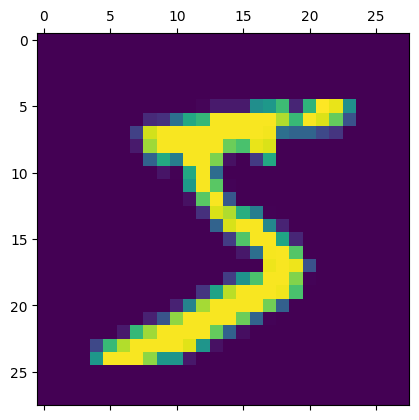

In [11]:
plt.matshow(x_train[0])

In [12]:
#it is a image of handwritten 5

In [14]:
#lets see what value is given in the training data for this image (it should be 5):
y_train[0]

5

In [15]:
#similarly lets check for some other training data:

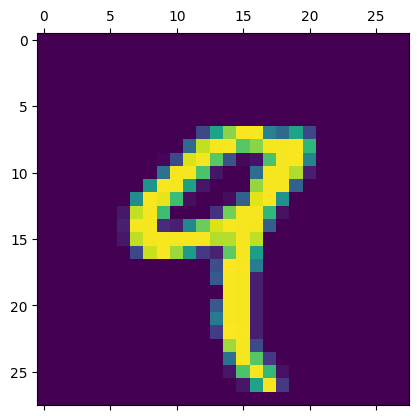

In [17]:
plt.matshow(x_train[4])

In [18]:
#value:
y_train[4]

9

In [19]:
#so we can see this is how the data is trained

#Scaling

In [33]:
x_train = x_train/255
x_test = x_test/255

In [34]:
#now we have to flatten the 28x28 training data into a single dimension of 784 , to provide the data to the neural network
# for that we will use reshape function of pandas

In [35]:
#shape before:
x_train.shape

(60000, 28, 28)

In [36]:
#shape we want :- (60000,784)
x_train.reshape(len(x_train),28*28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
x_train_flattened = x_train.reshape(len(x_train),28*28)

In [38]:
x_train_flattened.shape

(60000, 784)

In [39]:
#we got the desired shape;

In [40]:
#now same with the x_test i.e test input data:
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [41]:
#before:
x_test.shape

(10000, 28, 28)

In [42]:
#after:
x_test_flattened.shape

(10000, 784)

# Creating Neural Network

In [45]:
#sequential means a stack of layers in neural network
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #10 outputs and 784 inputs
]) 
#compilation of model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#training:
model.fit(x_train_flattened,y_train,epochs=5) #epochs=5 means itrate the training 5 times

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - accuracy: 0.8119 - loss: 0.7249
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.9139 - loss: 0.3124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9203 - loss: 0.2831
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.9235 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9248 - loss: 0.2694


In [46]:
# the neural network model is trained and compiled
# and we see with each itration the accuracy increased and loss decreased

#Evaluating the Accuracy on a Test dataset

In [47]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9128 - loss: 0.3051


[0.2688518166542053, 0.9243999719619751]

#prediction:

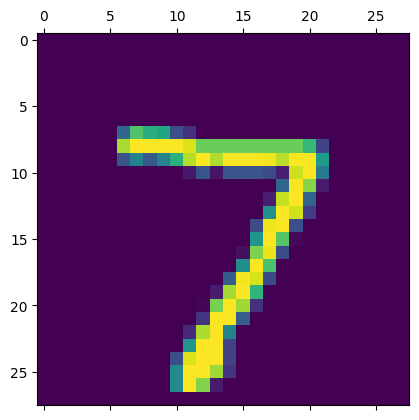

In [48]:
plt.matshow(x_test[0])

In [49]:
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step


In [52]:
#y_predicted will now have an array of 10 outputs from the neural network
# the 10 outputs are the prediction score for digits 0-9
# the digit which gets the maximum score will be the answer

In [54]:
y_predicted[0]

array([3.5815720e-02, 4.3012184e-07, 7.0149817e-02, 9.5077223e-01,
       3.7456322e-03, 9.6417174e-02, 1.6335430e-06, 9.9987406e-01,
       8.0712803e-02, 6.6156483e-01], dtype=float32)

In [56]:
# so the answer is :
np.argmax(y_predicted[0])

7

In [57]:
# and the model predicted it correctly , the image is of a handwritten 7 

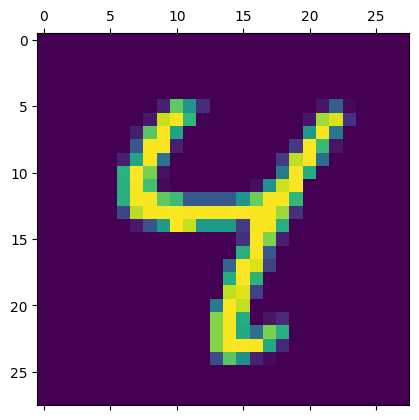

In [61]:
# lets test more:
plt.matshow(x_test[6])

In [62]:
y_predicted[6]

array([5.8640307e-04, 4.9841703e-05, 2.1095261e-04, 2.7573088e-02,
       9.9822962e-01, 4.4741237e-01, 1.0460371e-02, 2.3717408e-01,
       7.2815144e-01, 7.3133695e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[6])

4

# Confusion Matrix

In [64]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [65]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    5,    4,    4,    1,    0],
       [   0, 1119,    4,    1,    0,    1,    4,    2,    4,    0],
       [   6,   10,  932,   12,    8,    3,   12,   10,   34,    5],
       [   5,    0,   26,  894,    0,   33,    2,   13,   22,   15],
       [   1,    1,    5,    0,  913,    0,   10,    4,    6,   42],
       [  11,    3,    4,   19,   11,  780,   14,    9,   32,    9],
       [  12,    3,    7,    1,    7,   12,  912,    2,    2,    0],
       [   1,    6,   24,    3,    8,    0,    0,  951,    1,   34],
       [   8,   13,    7,   14,   10,   26,    9,   12,  856,   19],
       [  11,    7,    1,    7,   27,    6,    0,   21,    6,  923]])>

Text(70.72222222222221, 0.5, 'Truth')

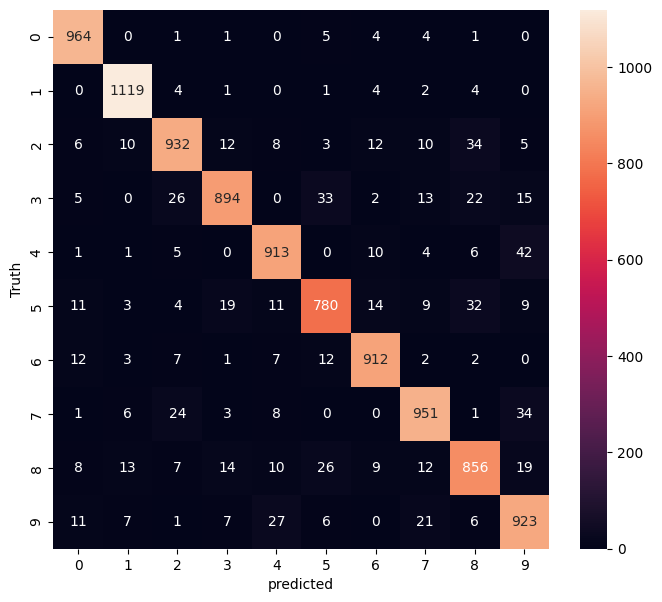

In [67]:
#lets see the confusion matrix in a heatmap:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

# Adding Hidden Layer

In [68]:
#lets add one more layer in the sequential
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #using relu activation function
    keras.layers.Dense(10,activation='sigmoid')
]) 
#compilation of model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#training:
model.fit(x_train_flattened,y_train,epochs=5)

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8718 - loss: 0.4505
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9623 - loss: 0.1313
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9736 - loss: 0.0887
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9791 - loss: 0.0669
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9847 - loss: 0.0487


In [69]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.9703 - loss: 0.0909


[0.0765448734164238, 0.9750999808311462]

In [76]:
y_predicted = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


In [77]:
# after adding a hidden layer , the accuracy increased from 92%----->97%

In [78]:
# we can see increased accuracy using confusing matrix

In [79]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(70.72222222222221, 0.5, 'Truth')

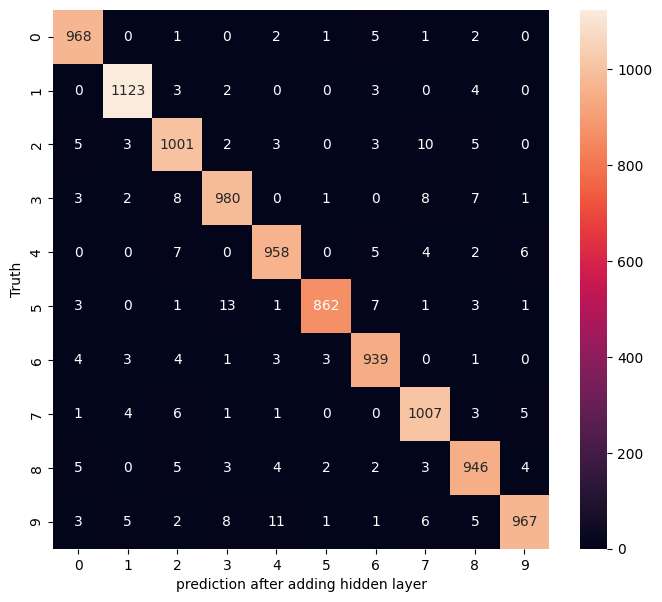

In [80]:
plt.figure(figsize=(8,7))
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('prediction after adding hidden layer')
plt.ylabel('Truth')